In [1]:
#The first step is loading our pickel files for dataset

In [2]:
import pickle
import numpy as np
import torch

infile = open("train.pkl",'rb')
dataset = pickle.load(infile) #x,y or clean, noisety
infile.close()

In [3]:
for img_id in range(dataset.shape[0]):
    dataset[img_id] = (dataset[img_id] - torch.min(dataset[img_id])) / (torch.max(dataset[img_id]) - torch.min(dataset[img_id]))
noisy_dataset = dataset + (25 / 255) * np.random.randn(200*1600,40,40)

In [4]:
training_data = []
for i, img in enumerate(noisy_dataset):
    training_data.append((img[None,:,:], dataset[i,None,:,:]))

In [5]:
train_loader = torch.utils.data.DataLoader(training_data,batch_size=128,shuffle=True)

In [6]:
len(training_data[0][0])

1

torch.Size([128, 1, 40, 40])


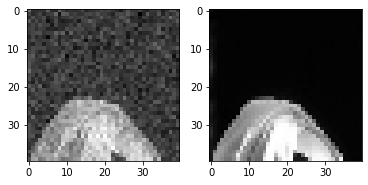

In [7]:
#Now that the dataset is prepared and shuffled, we can call the model function
import matplotlib.pyplot as plt
for noisy, clean in train_loader:
    print(noisy.shape)
    plt.subplot(1,2,1)
    plt.imshow(noisy[0,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(clean[0,0], cmap='gray')
    break

In [8]:
!ls

BSDS300				  train.pkl
BSDS300-20220507T194713Z-001.zip  training_dnCNN_IVP.py
Dataset_IVP.ipynb		  training_dnCNN_IVP_Noise_15_D15.ipynb
DnCNN_IVP.ipynb			  training_dnCNN_IVP_Noise_15_D20.ipynb
dncnn15.pt			  training_dnCNN_IVP_Noise_25_D15.ipynb
dncnn15_D15.pt			  training_dnCNN_IVP_Noise_25_D20.ipynb
dncnn_noise_15_D15.pt		  training_dnCNN_IVP_Noise_50_D15.ipynb
dncnn_noise_15_D20.pt		  training_dnCNN_IVP_Noise_50_D20.ipynb
dncnn_noise_25_D15.pt		  training_loss_noise_15_D20.txt
dncnn_noise_25_D20.pt		  training_loss_noise_25_D15.txt
dncnn_noise_50_D15.pt		  training_loss_noise_25_D20.txt
dncnn_noise_50_D20.pt		  training_loss_noise_50_D15.txt
test.pkl			  training_loss_noise_50_D20.txt
testing_dnCNN_IVP.ipynb


In [9]:
#pip install import-ipynb
#https://stackoverflow.com/questions/20186344/importing-an-ipynb-file-from-another-ipynb-file

In [10]:
import import_ipynb


In [11]:
import DnCNN_IVP

importing Jupyter notebook from DnCNN_IVP.ipynb


In [12]:
#Now that it is imported, let us create an instance
# model=DnCNN_IVP.DnCNN(1,1,20)
device=torch.device('cuda:0')
# model.to(device)

In [13]:
!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [14]:
from torchsummary import summary
# summary(model,input_size=(1,180,180))

In [15]:
N=128
from torch import nn
class loss_new(nn.Module): #N is dataset size
  def __init__(self):
    super(loss_new,self).__init__()
  def forward(self,out,y,x):
    return torch.norm(out-(y-x))/(2*N) #Where does N get defined?

In [16]:
import torch
from torch import optim
# optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9, weight_decay=0.0001)

In [17]:
criterion=loss_new()

In [18]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [19]:
#Need to set a batch size of 128
#Tensor to data loader
def training_function(net, loader, optim, model_name, epochs=50):
  from tqdm import tqdm
  loss_list=[]
  net.train()
  """
    y is the noisy image and it is used as input

    x is the noiseless image and it is used as a target label
  """
    
  for e in tqdm(range(epochs)): #For each epoch
    train_loss=0
    for i, (noisy, clean) in enumerate(loader):
      optim.zero_grad()#zero grad so they don't stack
      clean = clean.to(device, dtype=torch.float)
      noisy = noisy.to(device, dtype=torch.float)
      prediction = net(noisy)
      batch_loss = criterion(prediction, noisy, clean)
      batch_loss.backward()
      optim.step()
      scheduler.step()
      train_loss += batch_loss.item()

    train_loss = train_loss/len(loader)
    loss_list.append(train_loss)

    print ("Epoch {}: Has a loss of Loss: {:.6f}".format(e+1 ,train_loss))

  torch.save(model.state_dict(), model_name + '_D20.pt')
  return loss_list
  #return np.mean(train_loss)

In [ ]:
from torch.optim.lr_scheduler import StepLR
model=DnCNN_IVP.DnCNN(1,1,20)
device=torch.device('cuda:0')
model.to(device)
epoch = 50

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=1, gamma=0.001**(1/50))
print('beginning with training 20')

plot_me_25_D20=training_function(model, train_loader, optimizer, 'dncnn_noise_25', 50)

beginning with training 20


  2%|▏         | 1/50 [03:26<2:48:19, 206.11s/it]

Epoch 1: Has a loss of Loss: 0.279737


  4%|▍         | 2/50 [06:52<2:44:51, 206.08s/it]

Epoch 2: Has a loss of Loss: 0.233611


  6%|▌         | 3/50 [10:18<2:41:26, 206.10s/it]

Epoch 3: Has a loss of Loss: 0.233560


  8%|▊         | 4/50 [13:44<2:38:00, 206.10s/it]

Epoch 4: Has a loss of Loss: 0.233596


 10%|█         | 5/50 [17:10<2:34:35, 206.12s/it]

Epoch 5: Has a loss of Loss: 0.233573


 12%|█▏        | 6/50 [20:36<2:31:09, 206.12s/it]

Epoch 6: Has a loss of Loss: 0.233627


 14%|█▍        | 7/50 [24:02<2:27:43, 206.13s/it]

Epoch 7: Has a loss of Loss: 0.233603


 16%|█▌        | 8/50 [27:28<2:24:17, 206.13s/it]

Epoch 8: Has a loss of Loss: 0.233639


 18%|█▊        | 9/50 [30:55<2:20:51, 206.14s/it]

Epoch 9: Has a loss of Loss: 0.233583


 20%|██        | 10/50 [34:21<2:17:25, 206.15s/it]

Epoch 10: Has a loss of Loss: 0.233673


 22%|██▏       | 11/50 [37:47<2:14:00, 206.16s/it]

Epoch 11: Has a loss of Loss: 0.233594


 24%|██▍       | 12/50 [41:13<2:10:33, 206.16s/it]

Epoch 12: Has a loss of Loss: 0.233595


 26%|██▌       | 13/50 [44:39<2:07:08, 206.16s/it]

Epoch 13: Has a loss of Loss: 0.233594


 28%|██▊       | 14/50 [48:05<2:03:42, 206.17s/it]

Epoch 14: Has a loss of Loss: 0.233599


 30%|███       | 15/50 [51:32<2:00:15, 206.17s/it]

Epoch 15: Has a loss of Loss: 0.233560


 32%|███▏      | 16/50 [54:58<1:56:49, 206.17s/it]

Epoch 16: Has a loss of Loss: 0.233564


 34%|███▍      | 17/50 [58:24<1:53:23, 206.18s/it]

Epoch 17: Has a loss of Loss: 0.233617


 36%|███▌      | 18/50 [1:01:50<1:49:57, 206.17s/it]

Epoch 18: Has a loss of Loss: 0.233553


 38%|███▊      | 19/50 [1:05:16<1:46:31, 206.17s/it]

Epoch 19: Has a loss of Loss: 0.233563


 40%|████      | 20/50 [1:08:42<1:43:04, 206.16s/it]

Epoch 20: Has a loss of Loss: 0.233640


 42%|████▏     | 21/50 [1:12:09<1:39:39, 206.17s/it]

Epoch 21: Has a loss of Loss: 0.233589


 44%|████▍     | 22/50 [1:15:35<1:36:13, 206.18s/it]

Epoch 22: Has a loss of Loss: 0.233552


 46%|████▌     | 23/50 [1:19:01<1:32:46, 206.18s/it]

Epoch 23: Has a loss of Loss: 0.233583


 48%|████▊     | 24/50 [1:22:27<1:29:20, 206.17s/it]

Epoch 24: Has a loss of Loss: 0.233613


 50%|█████     | 25/50 [1:25:53<1:25:54, 206.18s/it]

Epoch 25: Has a loss of Loss: 0.233553


 52%|█████▏    | 26/50 [1:29:20<1:22:28, 206.17s/it]

Epoch 26: Has a loss of Loss: 0.233612


 54%|█████▍    | 27/50 [1:32:46<1:19:01, 206.17s/it]

Epoch 27: Has a loss of Loss: 0.233562


 56%|█████▌    | 28/50 [1:36:12<1:15:35, 206.15s/it]

Epoch 28: Has a loss of Loss: 0.233605


 58%|█████▊    | 29/50 [1:39:38<1:12:09, 206.17s/it]

Epoch 29: Has a loss of Loss: 0.233576


 60%|██████    | 30/50 [1:43:04<1:08:43, 206.16s/it]

Epoch 30: Has a loss of Loss: 0.233595


 62%|██████▏   | 31/50 [1:46:30<1:05:17, 206.17s/it]

Epoch 31: Has a loss of Loss: 0.233557


 64%|██████▍   | 32/50 [1:49:57<1:01:51, 206.18s/it]

Epoch 32: Has a loss of Loss: 0.233584


 66%|██████▌   | 33/50 [1:53:23<58:24, 206.17s/it]  

Epoch 33: Has a loss of Loss: 0.233550


 68%|██████▊   | 34/50 [1:56:49<54:58, 206.17s/it]

Epoch 34: Has a loss of Loss: 0.233567


 70%|███████   | 35/50 [2:00:15<51:32, 206.17s/it]

Epoch 35: Has a loss of Loss: 0.233646


 72%|███████▏  | 36/50 [2:03:41<48:06, 206.16s/it]

Epoch 36: Has a loss of Loss: 0.233579


 74%|███████▍  | 37/50 [2:07:07<44:40, 206.18s/it]

Epoch 37: Has a loss of Loss: 0.233603


 76%|███████▌  | 38/50 [2:10:34<41:14, 206.18s/it]

Epoch 38: Has a loss of Loss: 0.233551


 78%|███████▊  | 39/50 [2:14:00<37:47, 206.17s/it]

Epoch 39: Has a loss of Loss: 0.233625


 80%|████████  | 40/50 [2:17:26<34:21, 206.17s/it]

Epoch 40: Has a loss of Loss: 0.233547


 82%|████████▏ | 41/50 [2:20:52<30:55, 206.17s/it]

Epoch 41: Has a loss of Loss: 0.233565


 84%|████████▍ | 42/50 [2:24:18<27:29, 206.17s/it]

Epoch 42: Has a loss of Loss: 0.233575


 86%|████████▌ | 43/50 [2:27:44<24:03, 206.17s/it]

Epoch 43: Has a loss of Loss: 0.233580


 88%|████████▊ | 44/50 [2:31:11<20:37, 206.17s/it]

Epoch 44: Has a loss of Loss: 0.233557


 90%|█████████ | 45/50 [2:34:37<17:10, 206.17s/it]

Epoch 45: Has a loss of Loss: 0.233585


 92%|█████████▏| 46/50 [2:38:03<13:44, 206.17s/it]

Epoch 46: Has a loss of Loss: 0.233627


 94%|█████████▍| 47/50 [2:41:29<10:18, 206.17s/it]

Epoch 47: Has a loss of Loss: 0.233577


In [ ]:
with open('training_loss_noise_25_D20.txt', 'w') as f:
    f.writelines([str(loss) + '\n' for loss in plot_me_25_D20])

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot([i for i in range(0,50)], plot_me_25_D15, 'red', label= "noise-25-D15")
# # plt.plot([i for i in range(0,50)], plot_me_25, 'black', label= "noise-25")
# # plt.plot([i for i in range(0,50)], plot_me_50, 'blue', label= "noise-50")
# plt.legend()
# plt.savefig('training_curve_noise_25_D15.png')

In [ ]:
# We can't use a learning rate as high as theirs because we didn't take patches so we have less data and if we just learn super fast, model will explode and oscilate

In [ ]:
# torch.save(model.state_dict(), "dncnn15_0point00001.pt")

In [ ]:
# loaded=torch.load("dncnn15_0point0001.pt")

In [ ]:
#6 zeros slow
#3 zeros great
#1 zero explodes

In [ ]:
# model=DnCNN_IVP.DnCNN(1,1,20)
# model.to(device)

In [ ]:
# criterion=loss_new()
# optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.0001)

In [ ]:
# infile = open("BSDS_25.pkl",'rb')
# dataset = pickle.load(infile) #x,y or clean, noisety
# infile.close()
# train_loader=torch.utils.data.DataLoader(dataset,batch_size=32,shuffle=True)

In [ ]:
# plot_me=training_function(model,train_loader,optimizer,50)

In [ ]:
##### 